In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [57]:
data = pd.read_csv('D:/UIT/nam3/hk2/phantichdulieukinhdoanh/project/IS403_O22_HTCL_14/Dataset/VCB_2015_2023.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,15582.061523,15778.680664,15434.597656,15680.371094,15680.371094,630678
1,2015-01-06,15680.371094,16712.621094,15680.371094,16712.621094,16712.621094,3427132
2,2015-01-07,16761.775391,17007.550781,16270.228516,16516.001953,16516.001953,3182476
3,2015-01-08,16565.156250,17204.169922,16516.001953,17007.550781,17007.550781,2043014
4,2015-01-09,17155.013672,18187.263672,17155.013672,18138.109375,18138.109375,5155103


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1997 non-null   object 
 1   Open       1997 non-null   float64
 2   High       1997 non-null   float64
 3   Low        1997 non-null   float64
 4   Close      1997 non-null   float64
 5   Adj Close  1997 non-null   float64
 6   Volume     1997 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.3+ KB


In [59]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1997
Train data length : 1398
Validation data lenth : 599


In [60]:
data = data[['Date', 'Close']]

In [61]:
train_data = data[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Close
0,2015-01-05,15680.371094
1,2015-01-06,16712.621094
2,2015-01-07,16516.001953
3,2015-01-08,17007.550781
4,2015-01-09,18138.109375
...,...,...
1393,2020-08-06,54945.199219
1394,2020-08-07,55011.558594
1395,2020-08-10,54347.968750
1396,2020-08-11,54480.687500


In [62]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Close
1398,2020-08-13,55077.917969
1399,2020-08-14,54414.328125
1400,2020-08-17,54613.406250
1401,2020-08-18,54613.406250
1402,2020-08-19,55077.917969
...,...,...
1992,2022-12-26,66807.789062
1993,2022-12-27,66977.140625
1994,2022-12-28,67739.203125
1995,2022-12-29,68331.921875


In [63]:
dataset_train = train_data.Close.values
dataset_train.shape

(1398,)

In [64]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1398, 1)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1398, 1)

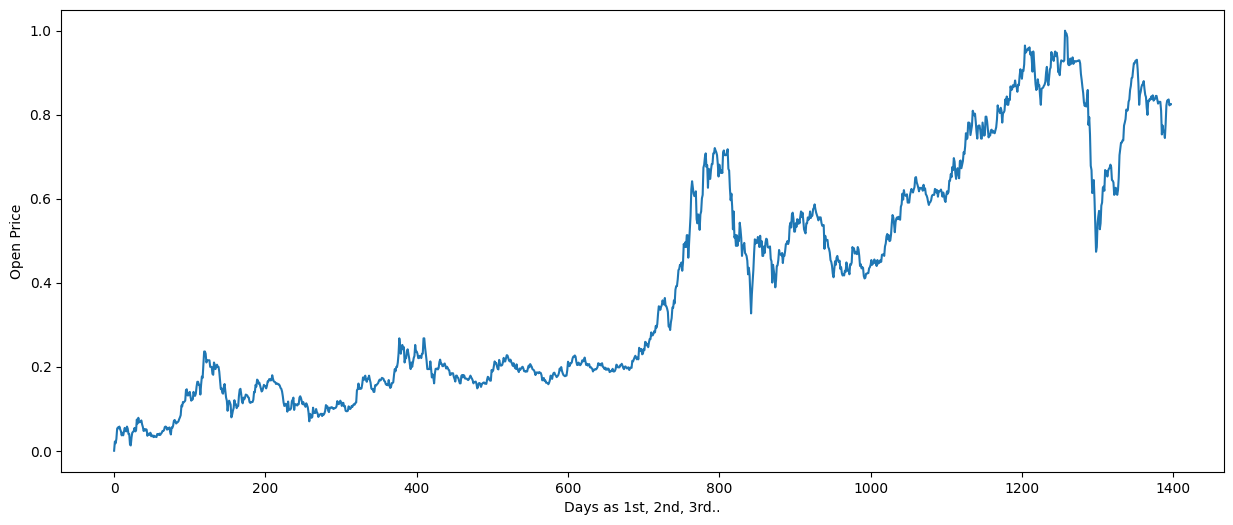

In [66]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [67]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [68]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1348, 50)
Shape of y_train before reshape : (1348,)


In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1348, 50, 1)
Shape of y_train after reshape : (1348, 1)


In [70]:
X_train[0]

array([[0.        ],
       [0.0219493 ],
       [0.01776848],
       [0.02822056],
       [0.05226025],
       [0.05539588],
       [0.05330545],
       [0.05748627],
       [0.05121506],
       [0.04598904],
       [0.0365822 ],
       [0.04285341],
       [0.0365822 ],
       [0.04494385],
       [0.05435069],
       [0.04912463],
       [0.04598904],
       [0.05748627],
       [0.05226025],
       [0.03971779],
       [0.03971779],
       [0.01463288],
       [0.01254247],
       [0.03135614],
       [0.04285341],
       [0.04494385],
       [0.04703424],
       [0.05435069],
       [0.04598904],
       [0.04807943],
       [0.07420956],
       [0.06480272],
       [0.07839038],
       [0.06793835],
       [0.06793835],
       [0.06898354],
       [0.07211917],
       [0.06271233],
       [0.05644108],
       [0.04703424],
       [0.05121506],
       [0.04807943],
       [0.05121506],
       [0.05016986],
       [0.03553697],
       [0.03971779],
       [0.04076302],
       [0.037

In [71]:
y_train[0]

array([0.03553697])

In [72]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 6.6383e-04 - loss: 0.4751
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.6153e-04 - loss: 0.2499
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.1727
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.1164
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0914
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0680
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0018 - loss: 0.0519
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0014 - loss: 0.0467
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 9.6189e-04 - loss: 0.0446
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0392e-04 - loss: 0.0345
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 9.6189e-04 - loss: 0.0277
Epoch 12/50
43/43 ━━━━━━━━━

In [73]:
# Losses
history.history["loss"]

[0.38906434178352356,
 0.22542913258075714,
 0.15151624381542206,
 0.11129192262887955,
 0.0846794992685318,
 0.06227436661720276,
 0.05116577446460724,
 0.04416698217391968,
 0.042678698897361755,
 0.03389250487089157,
 0.02732934057712555,
 0.028006909415125847,
 0.022185498848557472,
 0.021075639873743057,
 0.018807994201779366,
 0.019012678414583206,
 0.015389584004878998,
 0.014865226112306118,
 0.014881477691233158,
 0.012719440273940563,
 0.011896694079041481,
 0.010556116700172424,
 0.01111469604074955,
 0.010133665055036545,
 0.009113932959735394,
 0.008492779918015003,
 0.008257342502474785,
 0.007684789132326841,
 0.007838156074285507,
 0.007103501353412867,
 0.0076357703655958176,
 0.006730133201926947,
 0.006278814282268286,
 0.005568740423768759,
 0.005488225724548101,
 0.005234694108366966,
 0.0055065578781068325,
 0.005568097345530987,
 0.00506912125274539,
 0.004349607974290848,
 0.005564127117395401,
 0.004701019264757633,
 0.004666654393076897,
 0.004958983976393938,

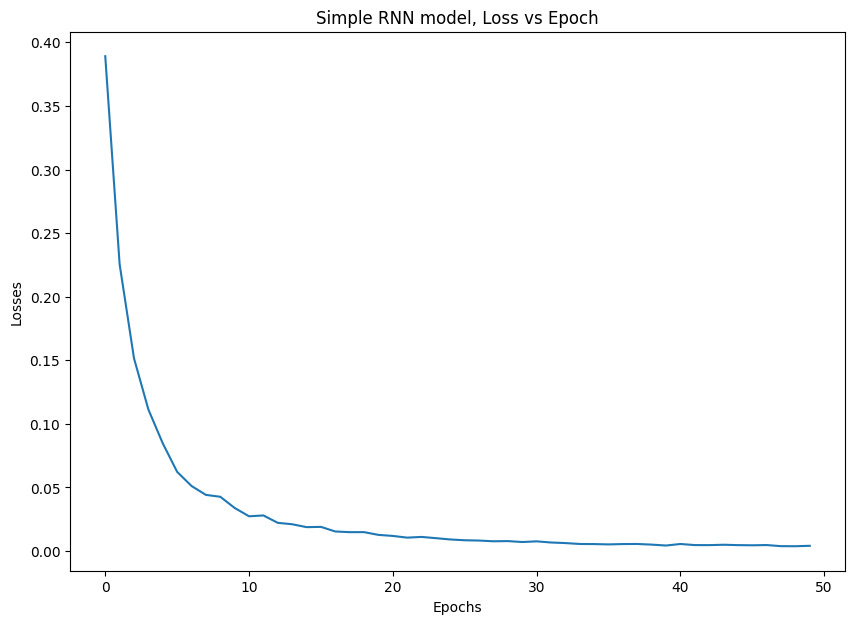

In [74]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

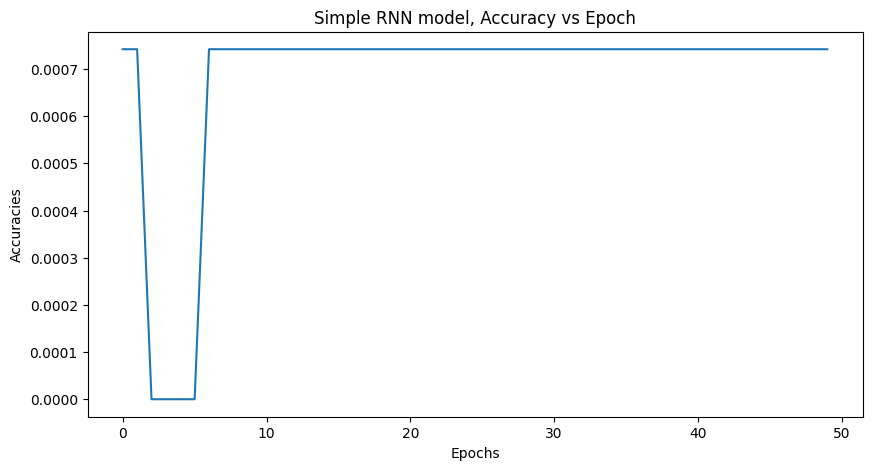

In [75]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [76]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


(1348, 1)

In [77]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(1348, 1)

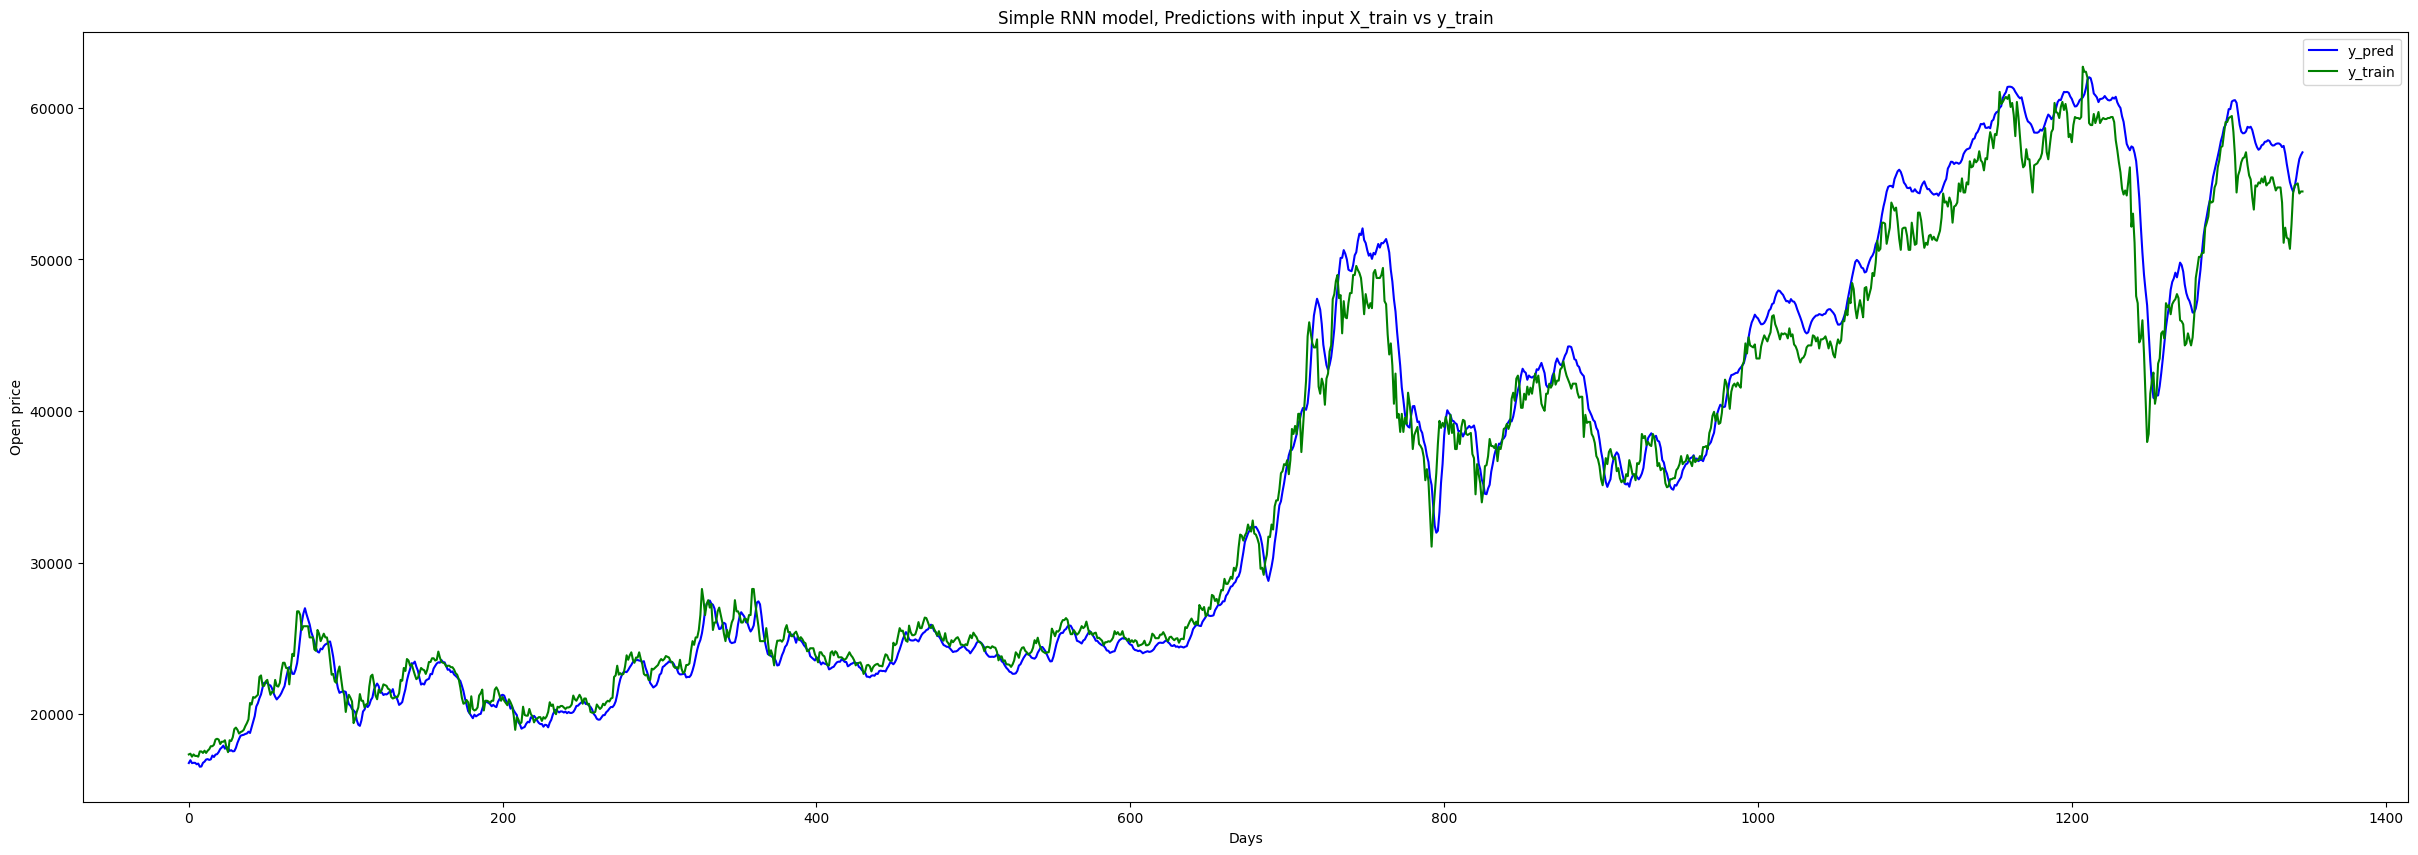

In [78]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [80]:
dataset_validation = validation_data.Close.values  # getting "close" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (599, 1)


In [81]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [82]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [83]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (549, 50)
Shape of y_test before reshape : (549,)


In [84]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [85]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (549, 50, 1)
Shape of y_test after reshape : (549, 1)


In [86]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Shape of y_pred_of_test : (549, 1)


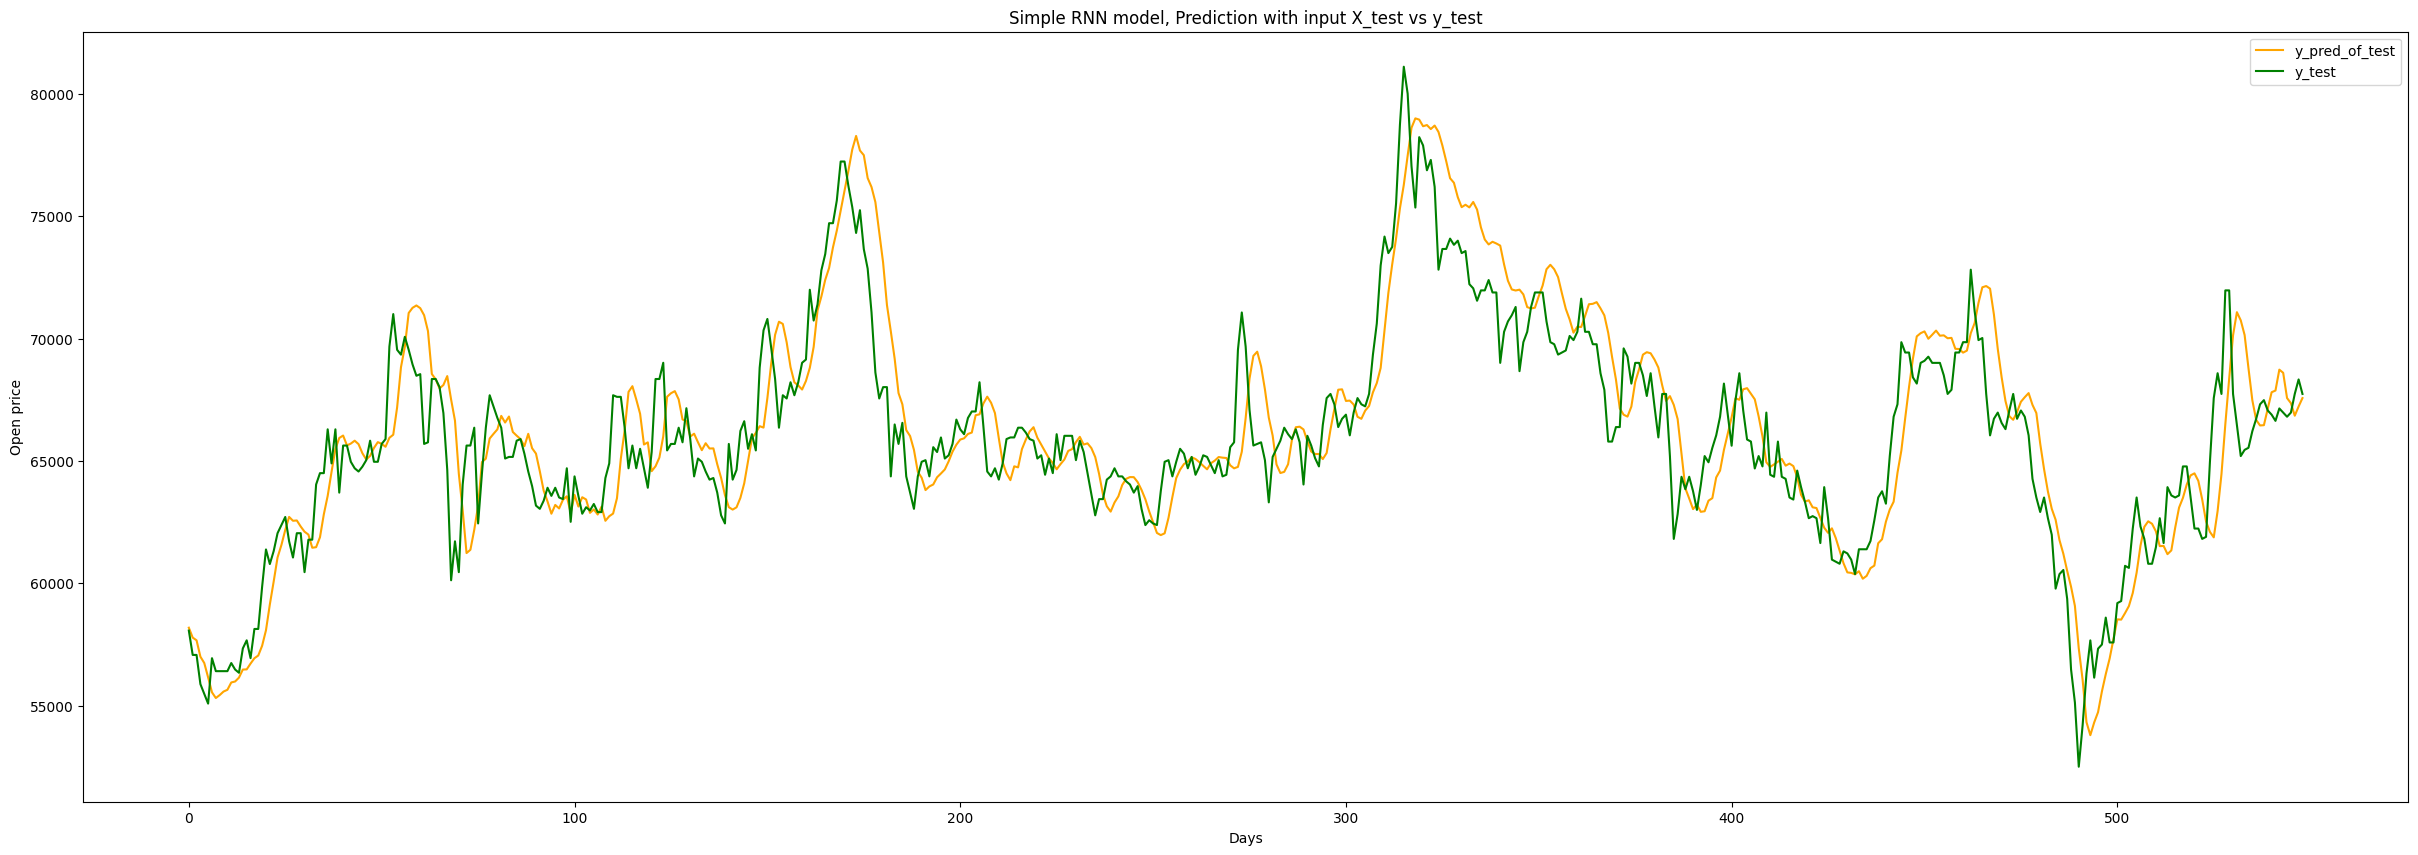

In [87]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

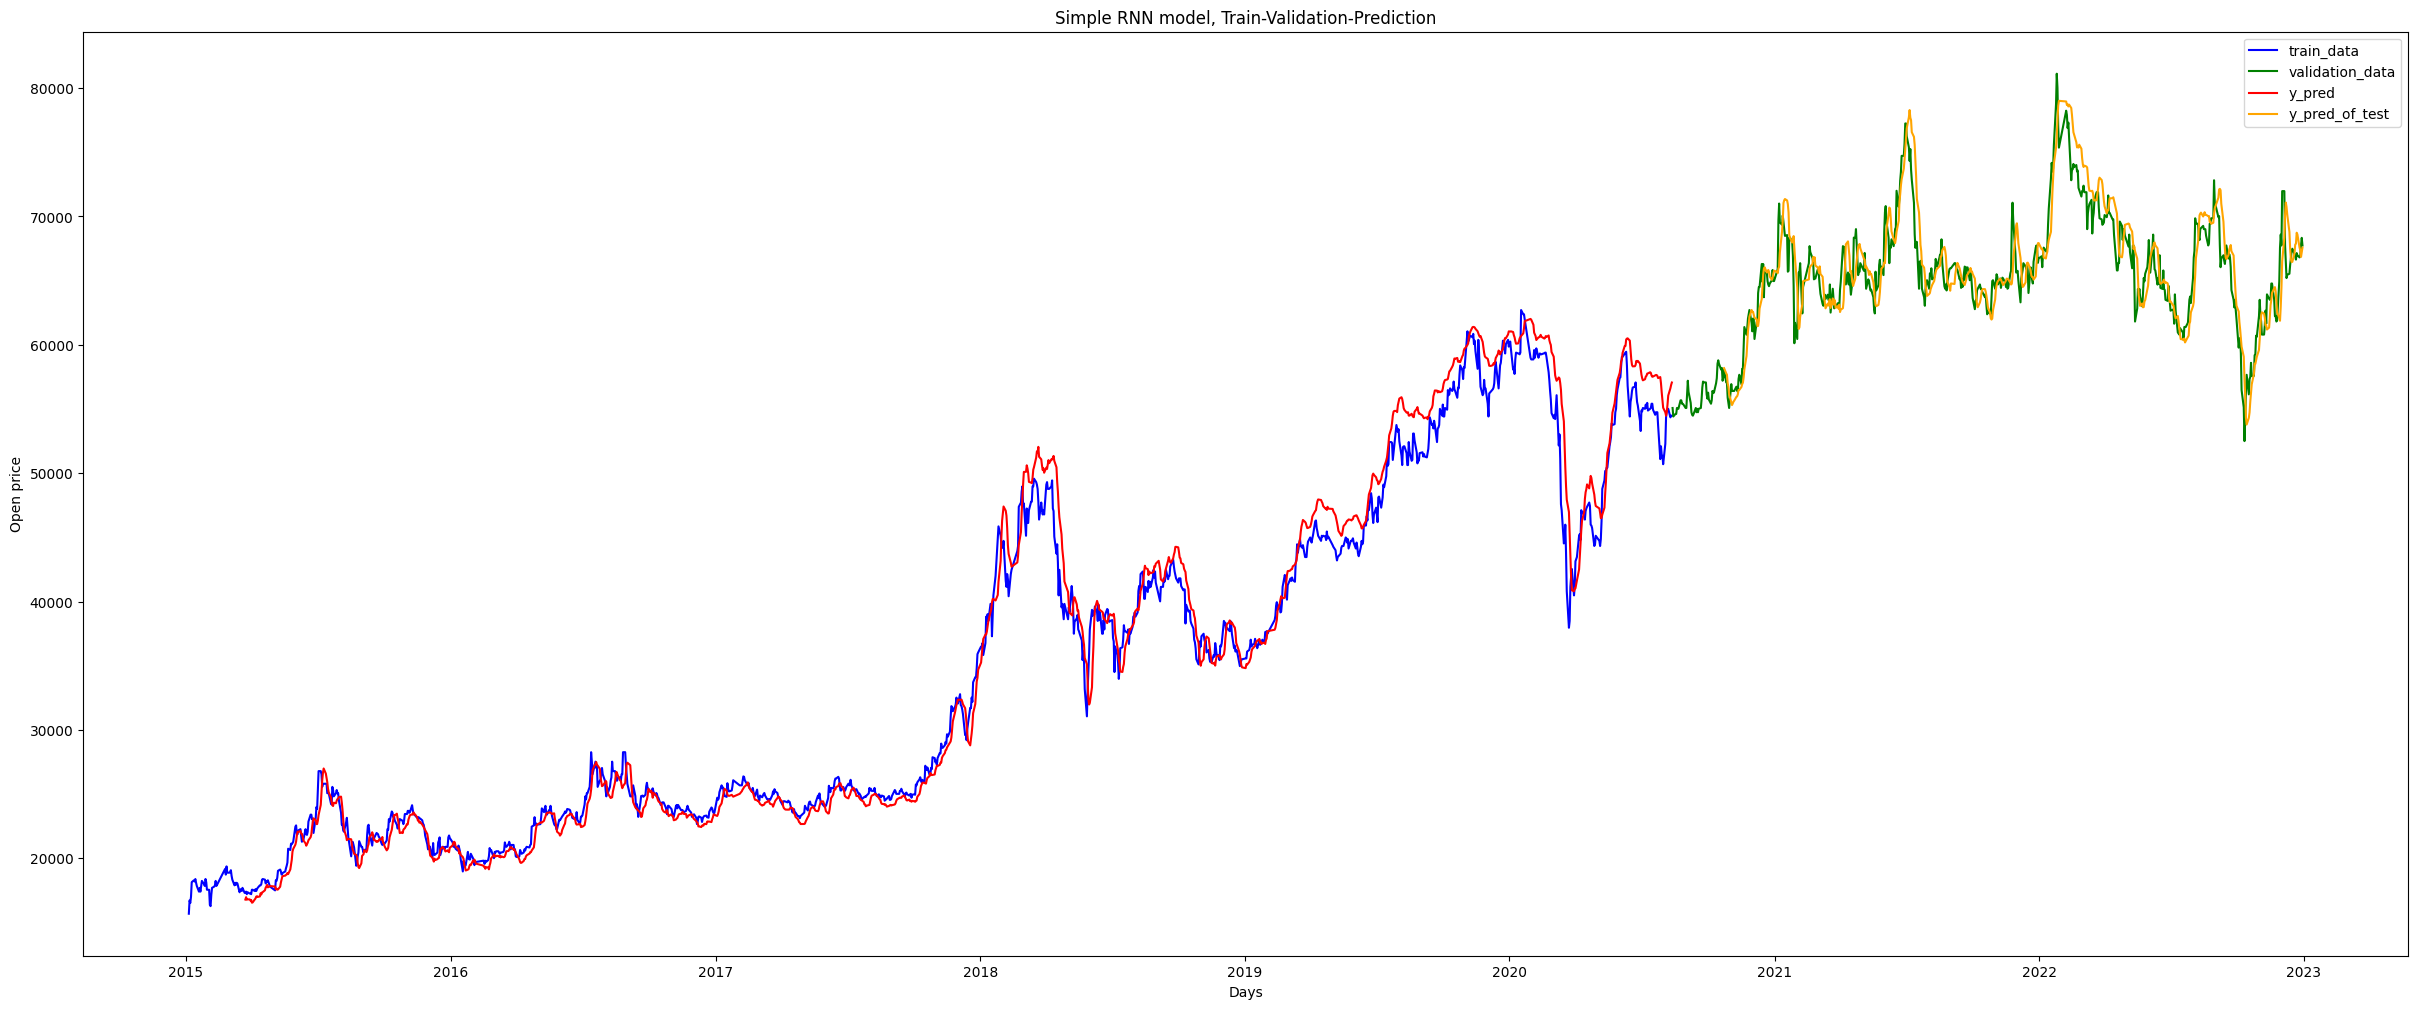

In [89]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Close, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Close, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()